# Toyota python Assignemnt 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model 
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

In [4]:
data = pd.read_csv('ToyotaCorolla.csv',engine='python') #  attribute

In [5]:
data.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


# Data pre processing

In [5]:
data.info() # object data type is to be removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.var()

Id                  1.734530e+05
Price               1.315487e+07
Age_08_04           3.459596e+02
Mfg_Month           1.124989e+01
Mfg_Year            2.373824e+00
KM                  1.406734e+09
HP                  2.244327e+02
Met_Color           2.196010e-01
Automatic           5.264333e-02
cc                  1.801041e+05
Doors               9.075927e-01
Cylinders           0.000000e+00
Gears               3.553619e-02
Quarterly_Tax       1.691563e+03
Weight              2.771088e+03
Mfr_Guarantee       2.419730e-01
BOVAG_Guarantee     9.361078e-02
Guarantee_Period    9.066270e+00
ABS                 1.519047e-01
Airbag_1            2.841226e-02
Airbag_2            2.004814e-01
Airco               2.501043e-01
Automatic_airco     5.326206e-02
Boardcomputer       2.079426e-01
CD_Player           1.709685e-01
Central_Lock        2.437564e-01
Powered_Windows     2.463303e-01
Power_Steering      2.180272e-02
Radio               1.249406e-01
Mistlamps           1.910665e-01
Sport_Mode

In [8]:
data.isnull().sum() # there is no missing value 

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [9]:
data.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


# Exploratory data annalysis

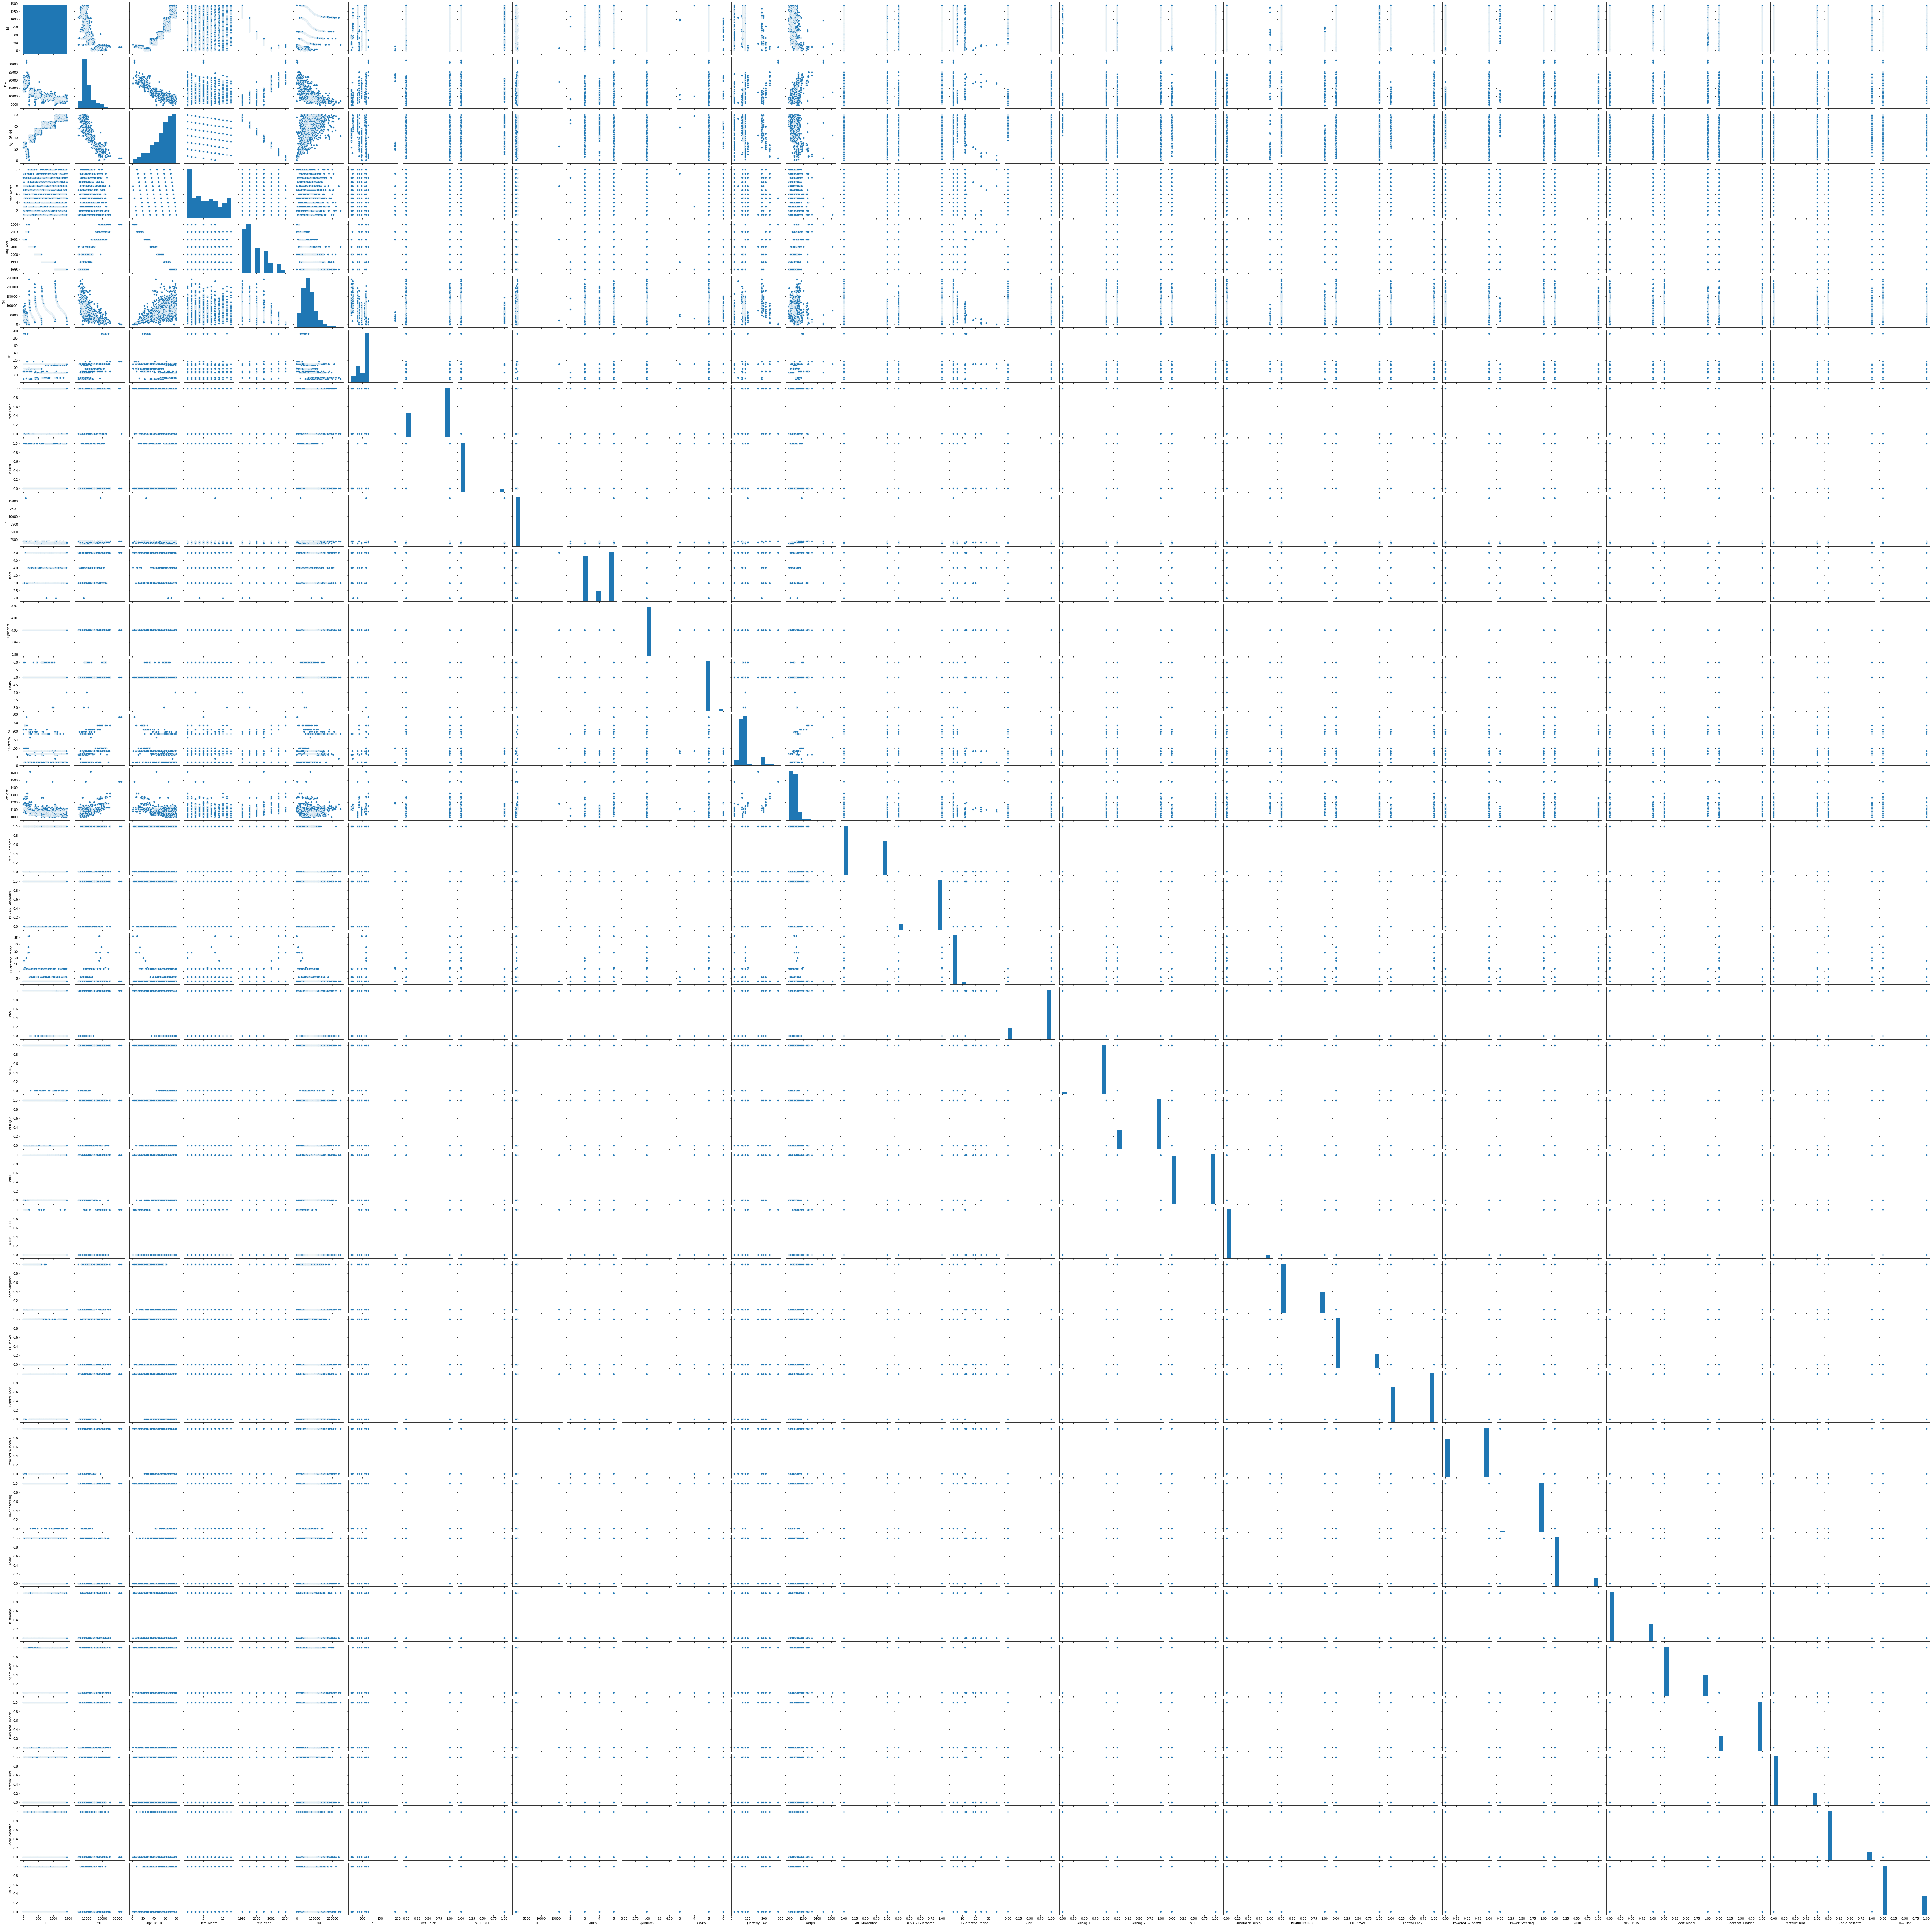

In [41]:
import seaborn as sns 
sns.pairplot(data)

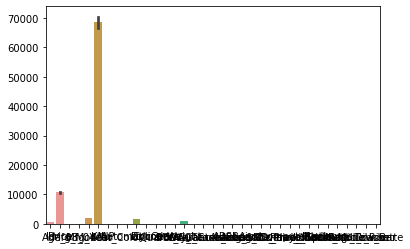

In [12]:
sns.barplot(data=data) # visual representaion of each variable 

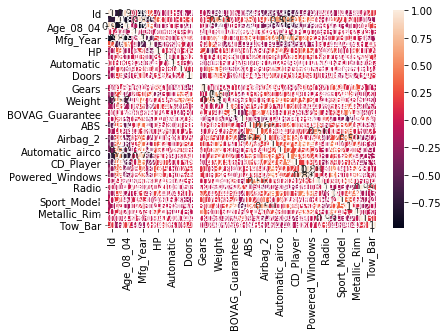

In [14]:
sns.heatmap(data.corr(),annot=True) # it representing positive and negative correaltoin 

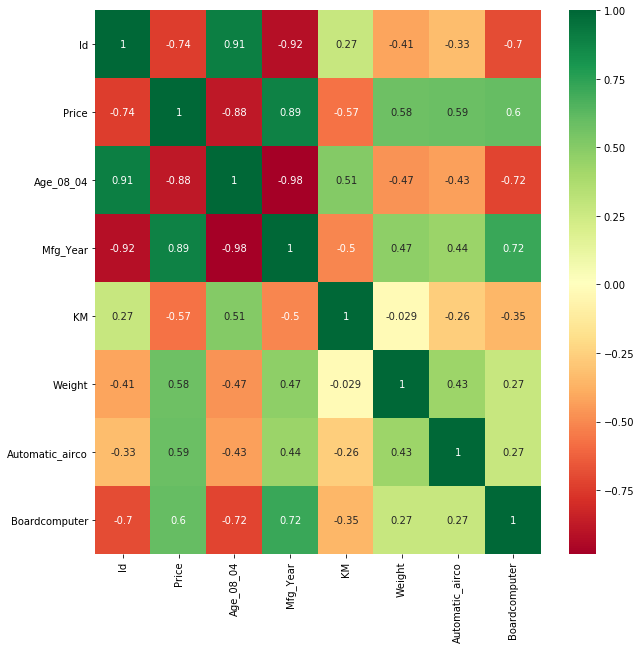

In [16]:
# Most correlated variables to clean outliers
corrmat = data.corr()
top_corr_features = corrmat.index[abs(corrmat["Price"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
data.keys()

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [18]:
X = data[[ "Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [19]:
y = data[['Price']]

In [20]:
#Firstly setting up of our train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state =1)

# Model Building

### Linear model making

In [21]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [22]:
#Create linear regression 
lm = linear_model.LinearRegression()

In [23]:
#Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Make predictions using the testing set
y_pred = lm.predict(X_test)
print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Linear Regression is 0.597878467380201
RMSE is:  5664560.078922759


# Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [26]:
rm = linear_model.Ridge()

In [27]:
#Train the model using the training sets
rm.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
# Make predictions using the testing set
y_pred = rm.predict(X_test)
print('The accuracy of the Ridge Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Ridge Regression is 0.5976871741469028
RMSE is:  5667254.766784037


In [29]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

1330.238704757152
0.8629195100491697
2380.039426525751
0.5978765085878539


# Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [31]:
las = linear_model.Lasso()

In [32]:
#Train the model using the training sets
las.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
# Make predictions using the testing set
y_pred = las.predict(X_test)
print('The accuracy of the Ridge Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Ridge Regression is 0.5976428604116621
RMSE is:  5667879.000492579


In [34]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

1330.2387055800305
0.8629195098795751
2380.040559114706
0.5978761258708887


# Elastic Net Regression

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [36]:
el = linear_model.ElasticNet()

In [37]:
#Train the model using the training sets
el.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
# Make predictions using the testing set
y_pred = el.predict(X_test)
print('The accuracy of the Ridge Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Ridge Regression is 0.5929628117499545
RMSE is:  5733805.380121671


In [39]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

1330.2827400634985
0.8629104342626064
2382.954984318958
0.5968906993846714
